24


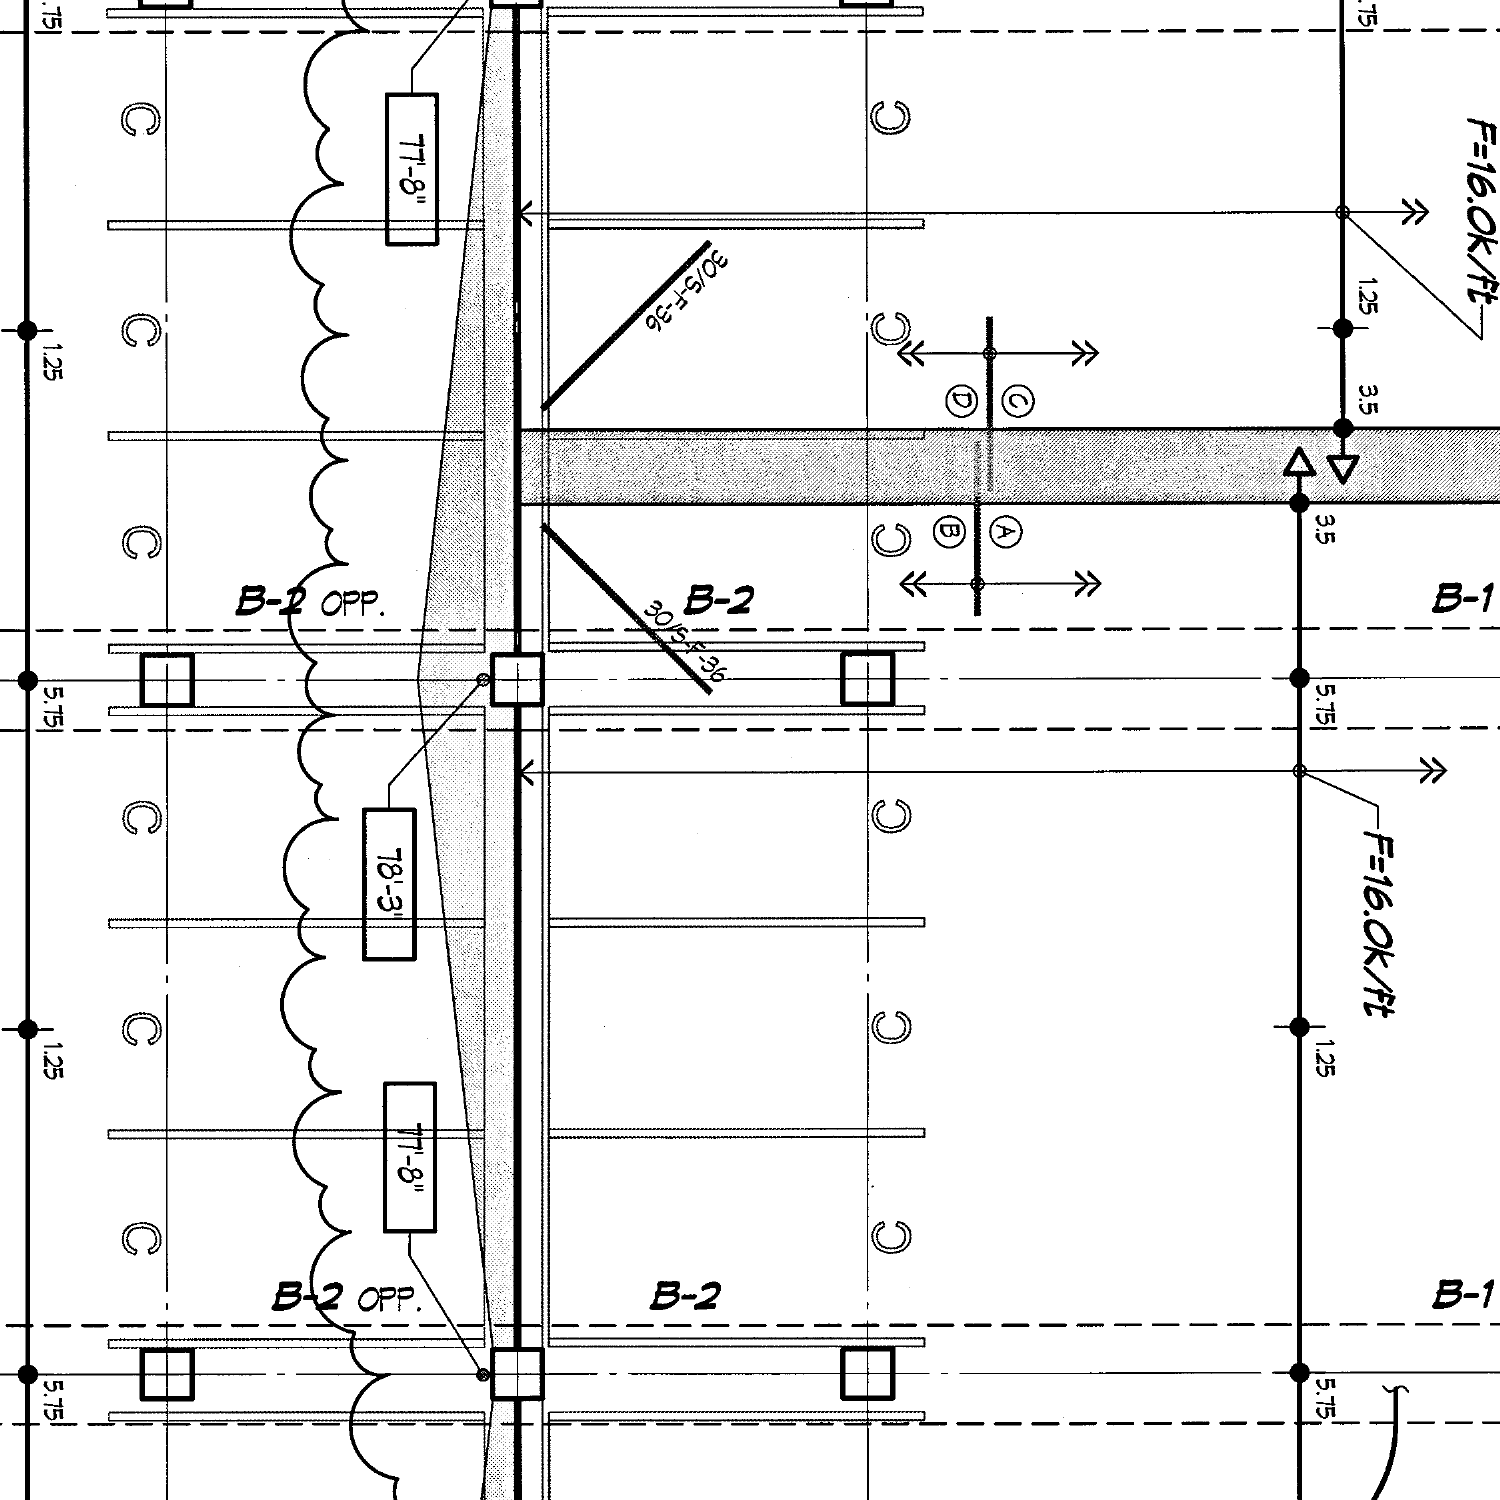

In [1]:
from ocr.line_detector import tile_image
import numpy as np
from PIL import Image
import cv2

img = cv2.imread("/home/sadid/PycharmProjects/sgs-drawing-analysis/data/miliennium_garage/original4.png")
img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
height, width = img.shape[:2]
tiles = tile_image(img)
# tile = img[1000:2000, 2500:4000].copy()
tile = tiles[14][0].copy()
print(len(tiles))

Image.fromarray(tile)

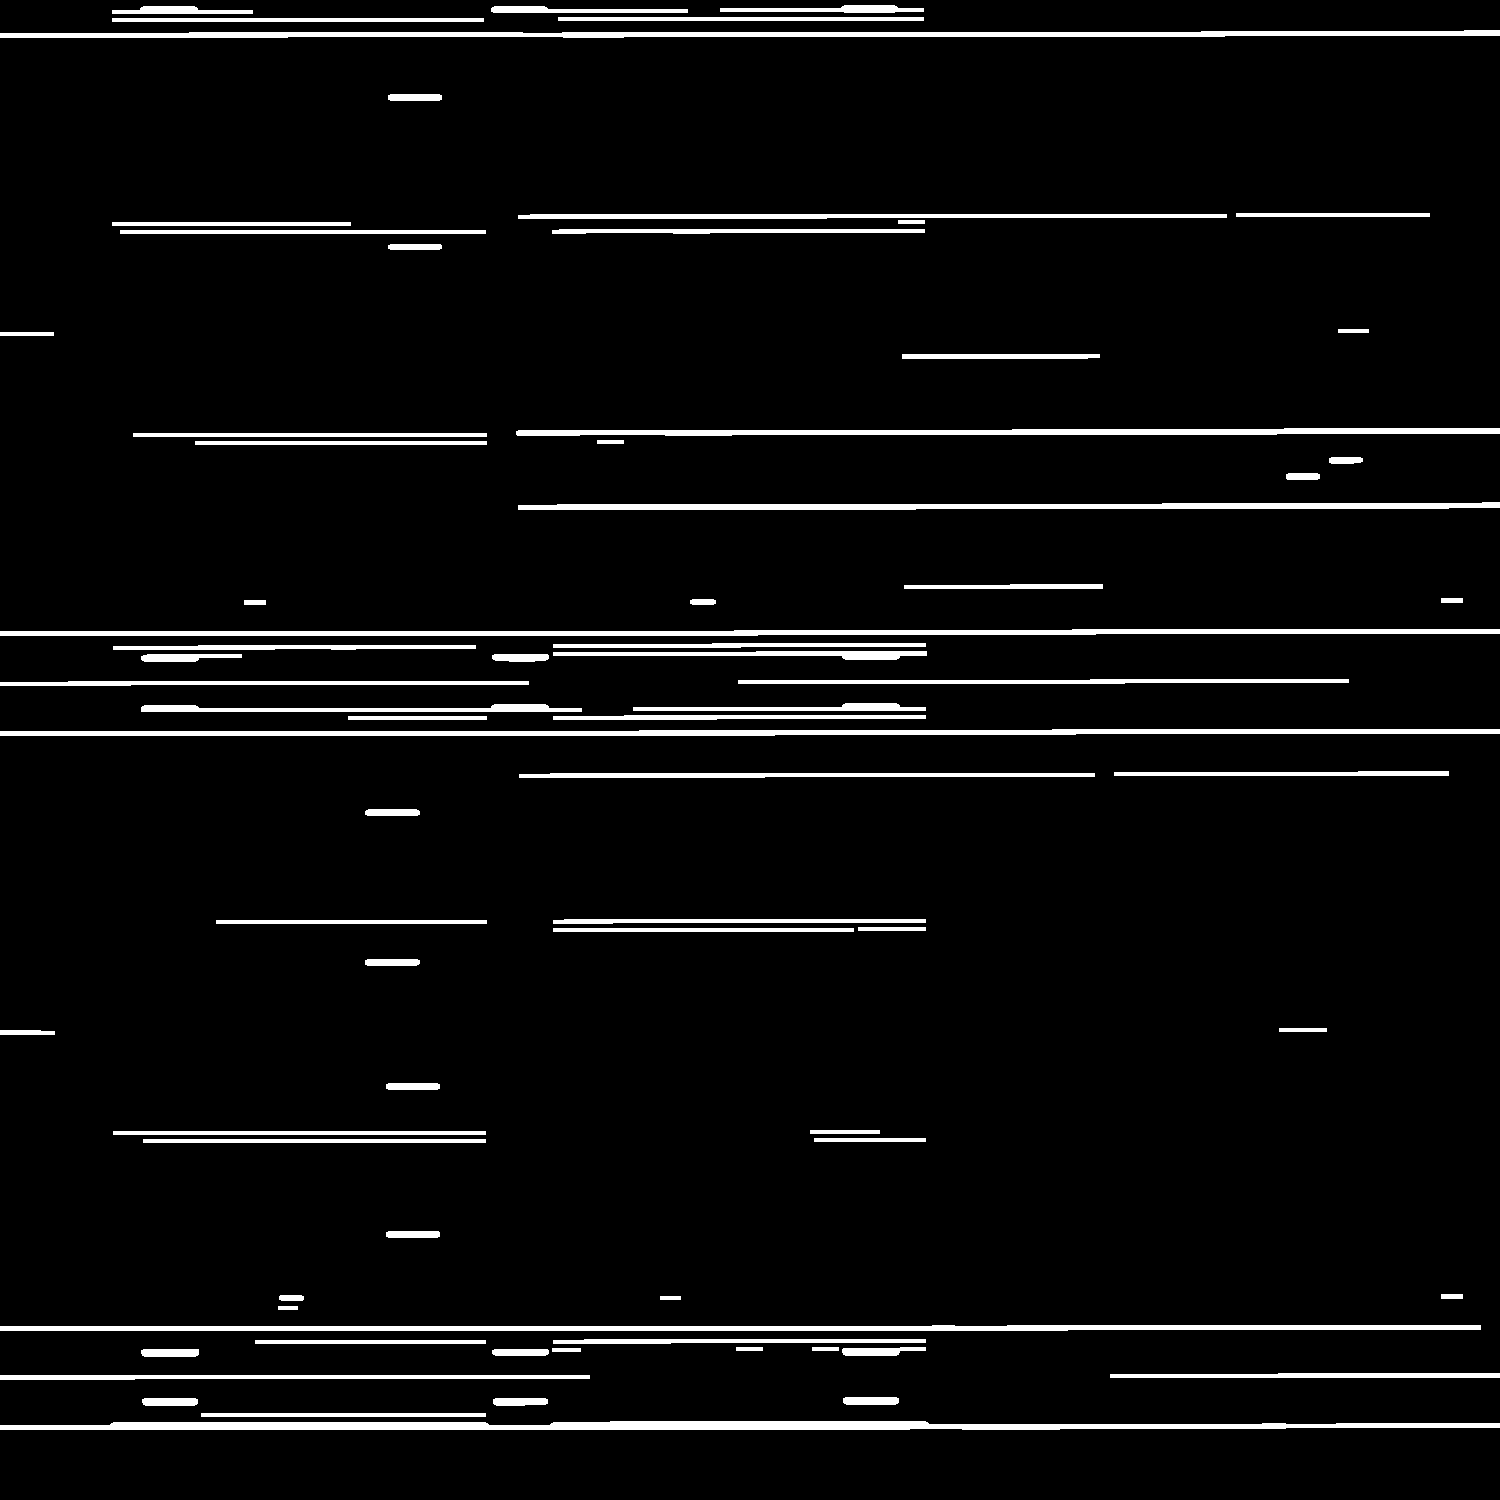

In [2]:
gray = cv2.cvtColor(tile, cv2.COLOR_BGR2GRAY)

_, bw = cv2.threshold(
    gray, 0, 255,
    cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
)
h_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (25, 1))
horizontal = cv2.morphologyEx(bw, cv2.MORPH_OPEN, h_kernel)
connect_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (35, 3))
dashed = cv2.morphologyEx(horizontal, cv2.MORPH_CLOSE, connect_kernel)

kernel = np.ones((2, 2), np.uint8)
blur = cv2.GaussianBlur(dashed, (7, 7), 0)
ret, thresh = cv2.threshold(blur, 80, 255, cv2.THRESH_BINARY)
erode = cv2.erode(thresh, kernel, iterations=3)
dilate = cv2.dilate(erode, kernel, iterations=3)

Image.fromarray(dilate)

In [3]:
lines = cv2.HoughLinesP(
    dashed,
    1,
    np.pi/180,
    threshold=60,
    minLineLength=100,
    maxLineGap=50
)

len(lines)

118

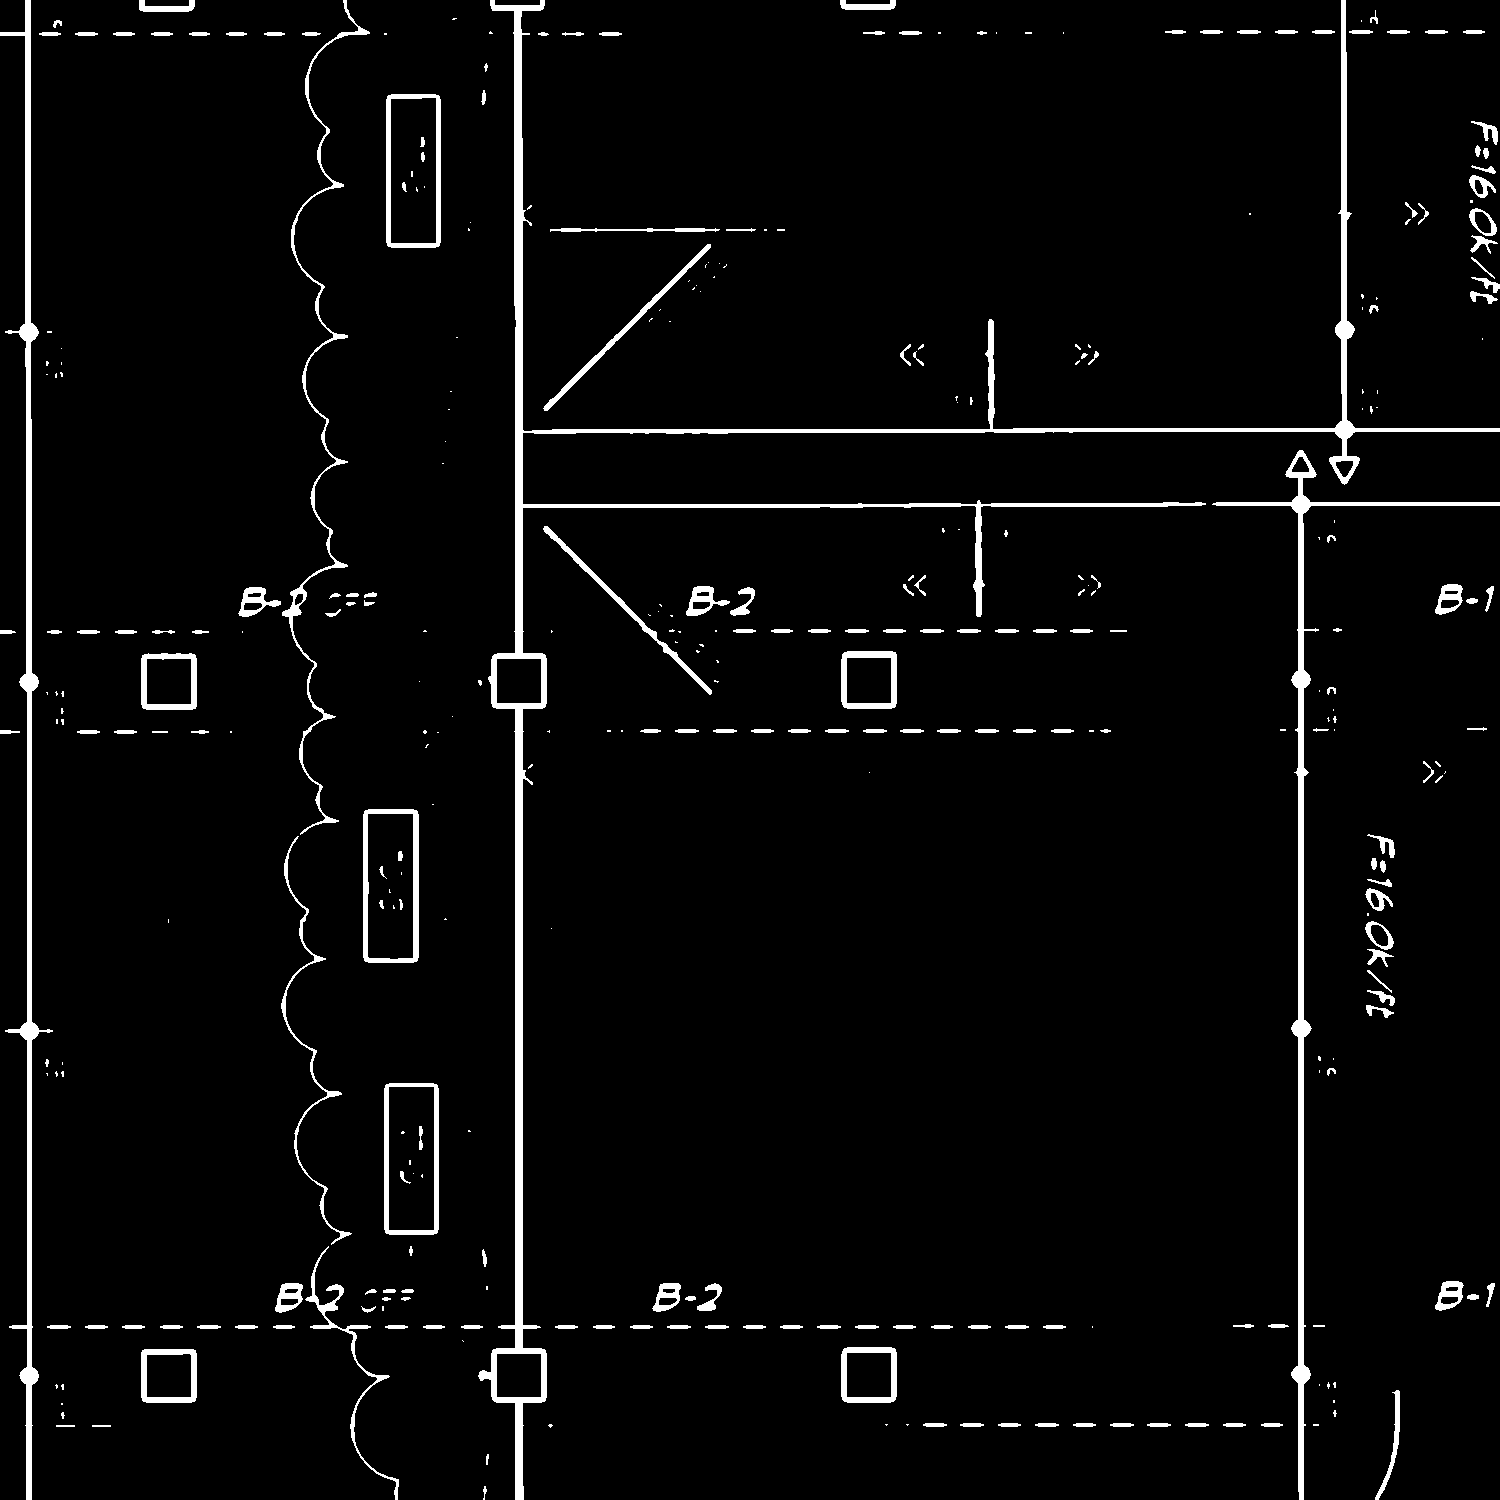

In [4]:
gray = cv2.cvtColor(tile, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 80, 255, cv2.THRESH_BINARY_INV)
kernel = np.ones((2, 2), np.uint8)
erode = cv2.erode(thresh, kernel)

blur = cv2.GaussianBlur(erode, (7, 7), 0)
ret, thresh = cv2.threshold(blur, 80, 255, cv2.THRESH_BINARY_INV)
erode = cv2.erode(thresh, kernel)

blur = cv2.GaussianBlur(erode, (5, 5), 0)
ret, thresh = cv2.threshold(blur, 80, 255, cv2.THRESH_BINARY_INV)
erode = cv2.erode(thresh, kernel)

Image.fromarray(erode)